In [98]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df_X = data['data']
df_y = data['target']

In [99]:
import numpy as np

In [100]:
df_X = np.array(df_X)
df_y = np.array(df_y)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [103]:
_, W_len = df_X.shape
W = np.random.rand(W_len)
b = np.random.rand(1)
print(W)
print(b)

[0.2786894  0.9376207  0.54995009 0.21008435 0.96356335 0.69782046
 0.44322624 0.78616089 0.29968611 0.07351227]
[0.48295653]


In [104]:
class linear_model():
    def __init__(self, W, b):
        """
        init model parameter.
        arguments:
            W: coefficient parameter of linear regression
            b: bias parameter
        """
        self.W = W
        self.b = b
    def forward(self, X):
        """
        calculate model's output with stored linear regression parameters
        arguments:
            x:input (shape: batch_size*feature_size)
        return:
            pred_y: prediction of linear regression model (shape: batch_size)
        """
        pred_y = 0
        for i in range(X.shape[1]):
            pred_y += W[i]*X[:,i] + b  # caution W[i]*X[:,i] shape would be (len_data, 1) because of X[:] part
        return pred_y

In [105]:
def mean_squared_error(true_y, pred_y):
    """
    calculate mean square error
    arguments:
        true_y: ground truth value of y
        pred_y: predicted value of y
    return:
        error: mean of squared error
    """
    error = (np.sqrt((true_y - pred_y)**2)).mean()
    return error

def loss(X, y):
    """
    calculate loss
    argument :
        X:
        W:
        b:
        y:
    return:
    """
    predictions = model.forward(X)
    L = mean_squared_error(predictions, y)
    return L

def gradient(X, y):
    """
    calculate gradient
    arguments:
    return:
        gradient
    """
    N = len(y)
    y_pred = model.forward(X)
    dW = 1/N * X.T.dot(y_pred - y)
    db = (y_pred - y).mean()
    return dW, db

In [106]:
model = linear_model(W, b)
dW, db = gradient(train_X, train_y)

In [107]:
LEARNING_RATE = 0.1

losses = []

for i in range(1, 1001):
    dW, db = gradient(train_X, train_y)
    model.W -= LEARNING_RATE * dW
    model.b -= LEARNING_RATE * db
    L = loss(train_X, train_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 66.1914
Iteration 20 : Loss 65.9833
Iteration 30 : Loss 65.7829
Iteration 40 : Loss 65.5849
Iteration 50 : Loss 65.3885
Iteration 60 : Loss 65.1936
Iteration 70 : Loss 65.0002
Iteration 80 : Loss 64.8108
Iteration 90 : Loss 64.6231
Iteration 100 : Loss 64.4369
Iteration 110 : Loss 64.2521
Iteration 120 : Loss 64.0688
Iteration 130 : Loss 63.8869
Iteration 140 : Loss 63.7105
Iteration 150 : Loss 63.5357
Iteration 160 : Loss 63.3621
Iteration 170 : Loss 63.1899
Iteration 180 : Loss 63.0191
Iteration 190 : Loss 62.8495
Iteration 200 : Loss 62.6813
Iteration 210 : Loss 62.5164
Iteration 220 : Loss 62.3536
Iteration 230 : Loss 62.1946
Iteration 240 : Loss 62.0369
Iteration 250 : Loss 61.8816
Iteration 260 : Loss 61.7275
Iteration 270 : Loss 61.5745
Iteration 280 : Loss 61.4242
Iteration 290 : Loss 61.2765
Iteration 300 : Loss 61.1299
Iteration 310 : Loss 60.9847
Iteration 320 : Loss 60.8418
Iteration 330 : Loss 60.7028
Iteration 340 : Loss 60.5649
Iteration 350 : Loss 60

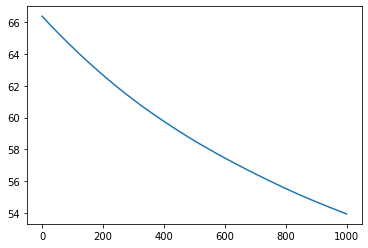

In [108]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [111]:
prediction = model.forward(test_X)
mse = loss(test_X, test_y)
mse

50.20286033585889

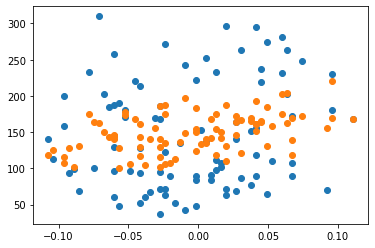

In [113]:
plt.scatter(test_X[:, 0], test_y)
plt.scatter(test_X[:, 0], prediction)
plt.show()